# Imports

In [ ]:

!pip install -U cade
!pip install git+https://github.com/valedica/gensim.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 99 kB 4.6 MB/s 
     |████████████████████████████████| 132 kB 49.2 MB/s 
     |████████████████████████████████| 8.9 MB 45.8 MB/s 
     |████████████████████████████████| 79 kB 9.4 MB/s 
     |████████████████████████████████| 138 kB 52.5 MB/s 
     |████████████████████████████████| 127 kB 78.7 MB/s 
  Created wheel for smart-open: filename=smart_open-1.10.0-py3-none-any.whl size=90641 sha256=ca80c2f47aaf731bb6748c2fa4ab173efec5e3caf3a99df3878165b87b9bff20
  Stored in directory: /root/.cache/pip/wheels/1f/e5/fc/7412935a7184efc8ad377e948c81b1cc99b6a02eb8dc7c918c
Successfully built smart-open
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: smart-open
    Found existing installation: smart-open 5.2.1
    Uninstalling 

In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
from gensim.models import Word2Vec
from collections import Counter
import random
import numpy as np
import pandas as pd
from collections import Counter
from cade.cade import CADE
from scipy.spatial.distance import cosine
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mc
from sklearn.manifold import TSNE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# CADE

In [ ]:
def most_frequent_words(n_emb, n_words, holytext):
  os.chdir('/content/drive/MyDrive/Magistrale/Secondo semestre/DS/Progetto/Embeddings_CADE/')

  #get n_emb holy embeddings
  embeddings = []
  for it in range(n_emb):
    model = Word2Vec.load(holytext + '_nl_cade' + str(it) + '.model')
    embeddings.append(model)

  #get most frequent n_words 
  words = []
  for it in range(n_emb):
    for word in embeddings[it].wv.index2entity[:n_words]:
      words.append(word)
  x = np.array(words)
  words = np.unique(x)

  return words

In [ ]:
def data_for_TSNE(n_emb, n_words, holytext):
  os.chdir('/content/drive/MyDrive/Magistrale/Secondo semestre/DS/Progetto/Embeddings_CADE/')
  top_frec_words = most_frequent_words(n_emb, n_words, holytext)

  #get n_emb holy embeddings
  embeddings = []
  for it in range(n_emb):
    model = Word2Vec.load(holytext+ '_nl_cade' + str(it) + '.model')
    X = model[top_frec_words] 
    embeddings.append(X)
  embeddings = np.array(embeddings)
  
  #get mean value for each vector of each embedding
  final_data = np.mean(embeddings, axis = 0)

  tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
  Y = tsne_model.fit_transform(final_data)

  return final_data, top_frec_words, Y

In [ ]:
def plot_TSNE(top_frec_words, Y, holytext):
  fig, ax = plt.subplots(figsize=(20,10))
  ax.scatter(Y[:, 0], Y[:, 1])
  words2 = list(top_frec_words)
  ax.set_title(f'Two-dimensional semantic representation of {holytext} word embeddings using t-SNE', fontsize=20)
  for i, word in enumerate(words2):
      plt.annotate(word, xy=(Y[i, 0], Y[i, 1]), fontsize=16)
  os.chdir('/content/drive/MyDrive/Magistrale/Secondo semestre/DS/Progetto/graphs/')
  plt.savefig(holytext + 'CADE')

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.


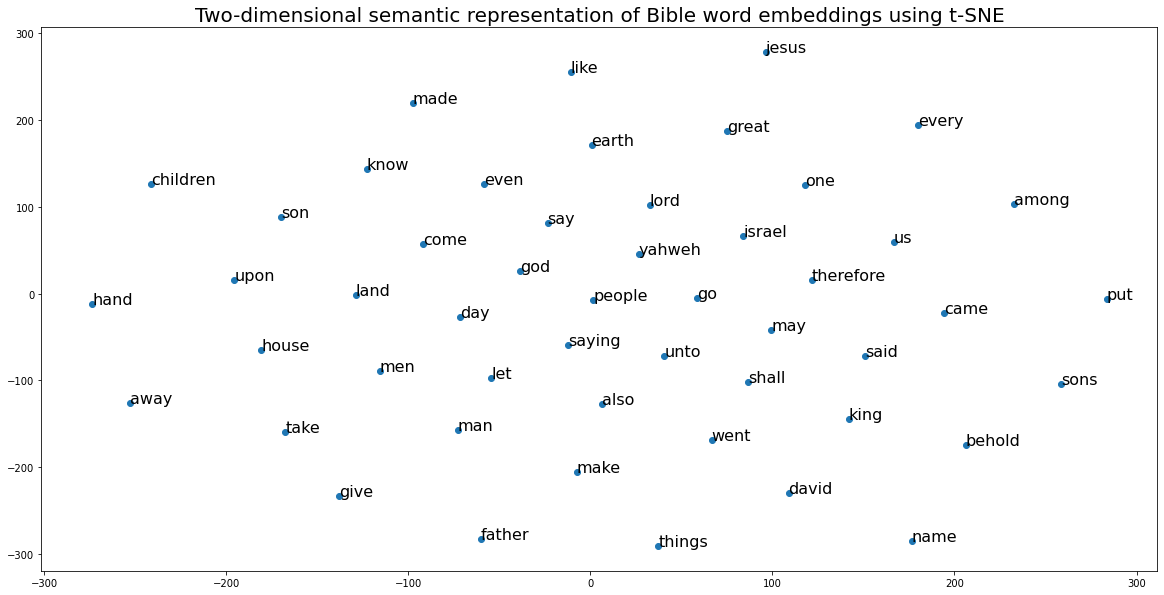

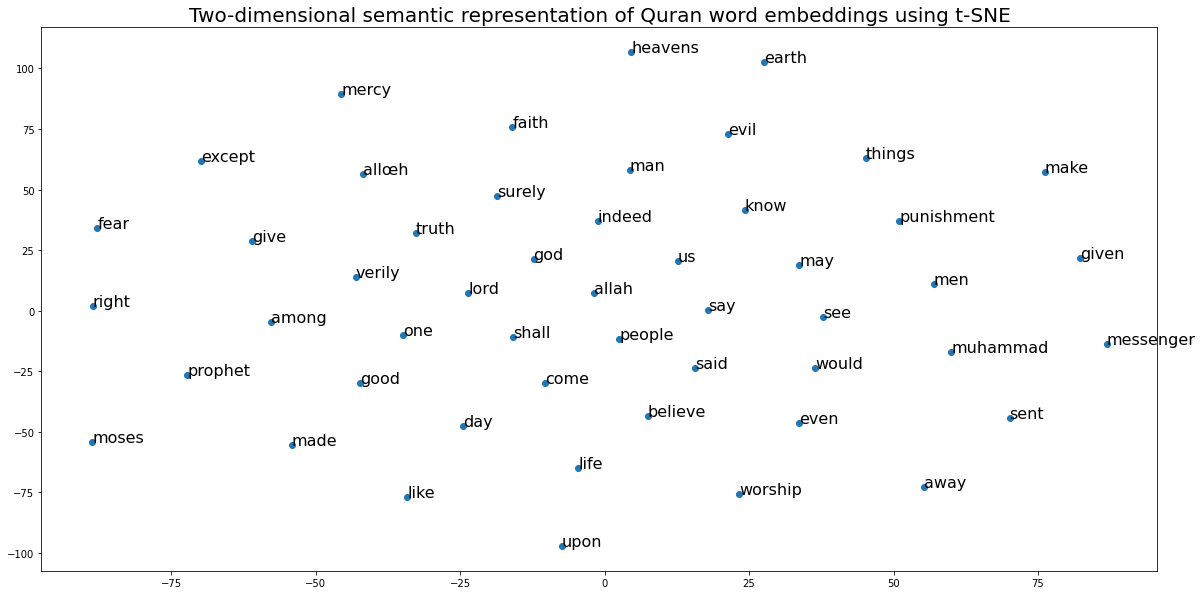

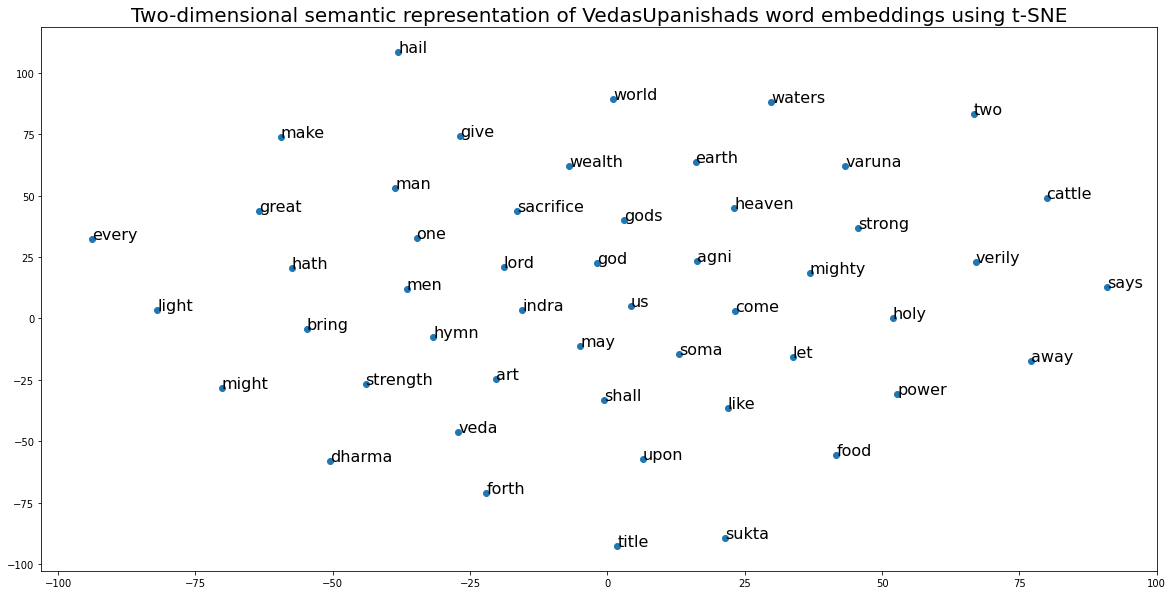

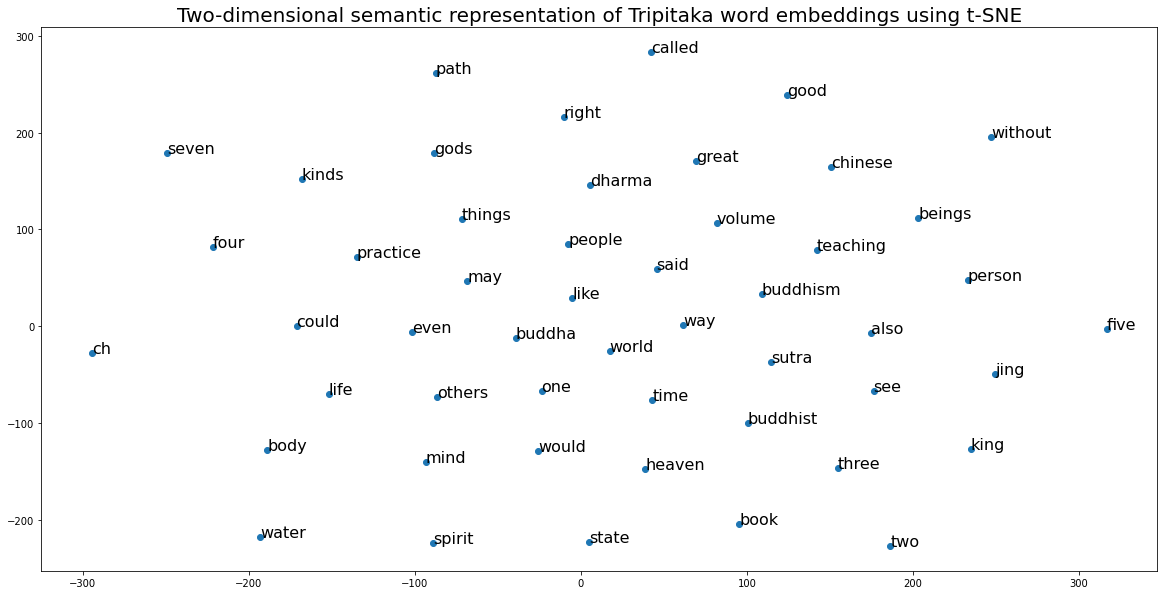

In [ ]:
texts = ['Bible', 'Quran', 'VedasUpanishads', 'Tripitaka']

for text in texts:
  final_data, top_frec_words, Y = data_for_TSNE(30, 50, text)
  plot_TSNE(top_frec_words, Y, text)

# Word2vec

In [ ]:
def most_frequent_words(n_emb, n_words, holytext):
  os.chdir('/content/drive/MyDrive/Magistrale/Secondo semestre/DS/Progetto/' + holytext + '_nl_embeddings')
  #holytext = holytext.lower()

  #get n_emb holy embeddings
  embeddings = []
  for it in range(n_emb):
    model = Word2Vec.load(holytext.lower() + '_' + str(it) + '.model')
    embeddings.append(model)

  #get most frequent n_words 
  words = []
  for it in range(n_emb):
    for word in embeddings[it].wv.index2entity[:n_words]:
      words.append(word)
  x = np.array(words)
  words = np.unique(x)

  return words

In [ ]:
def data_for_TSNE(n_emb, n_words, holytext):
  os.chdir('/content/drive/MyDrive/Magistrale/Secondo semestre/DS/Progetto/' + holytext + '_nl_embeddings')
  top_frec_words = most_frequent_words(n_emb, n_words, holytext)

  #holytext = holytext.lower()
  #get n_emb holy embeddings
  embeddings = []
  for it in range(n_emb):
    model = Word2Vec.load(holytext.lower() + '_' + str(it) + '.model')
    X = model[top_frec_words] 
    embeddings.append(X)
  embeddings = np.array(embeddings)
  
  #get mean value for each vector of each embedding
  final_data = np.mean(embeddings, axis = 0)

  tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
  Y = tsne_model.fit_transform(final_data)

  return final_data, top_frec_words, Y

In [ ]:
def plot_TSNE(top_frec_words, Y, holytext):
  fig, ax = plt.subplots(figsize=(20,10))
  ax.scatter(Y[:, 0], Y[:, 1])
  words2 = list(top_frec_words)
  ax.set_title(f'Two-dimensional semantic representation of {holytext} word embeddings using t-SNE', fontsize=20)
  for i, word in enumerate(words2):
      plt.annotate(word, xy=(Y[i, 0], Y[i, 1]), fontsize=16)
  os.chdir('/content/drive/MyDrive/Magistrale/Secondo semestre/DS/Progetto/graphs/')
  plt.savefig(holytext + 'W2V')
  #plt.show()

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.


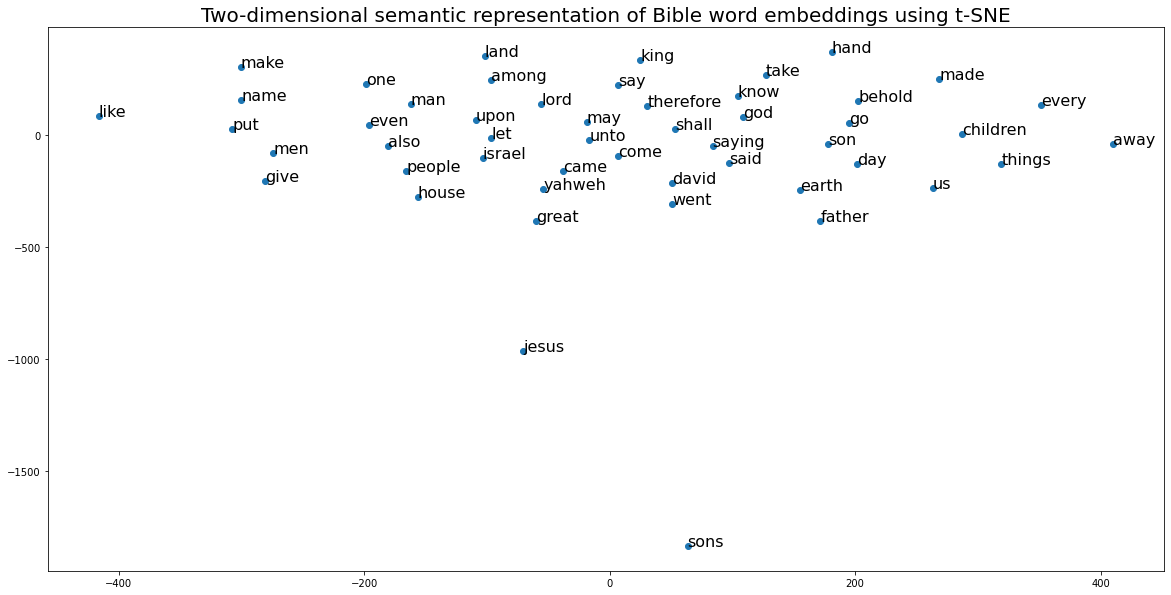

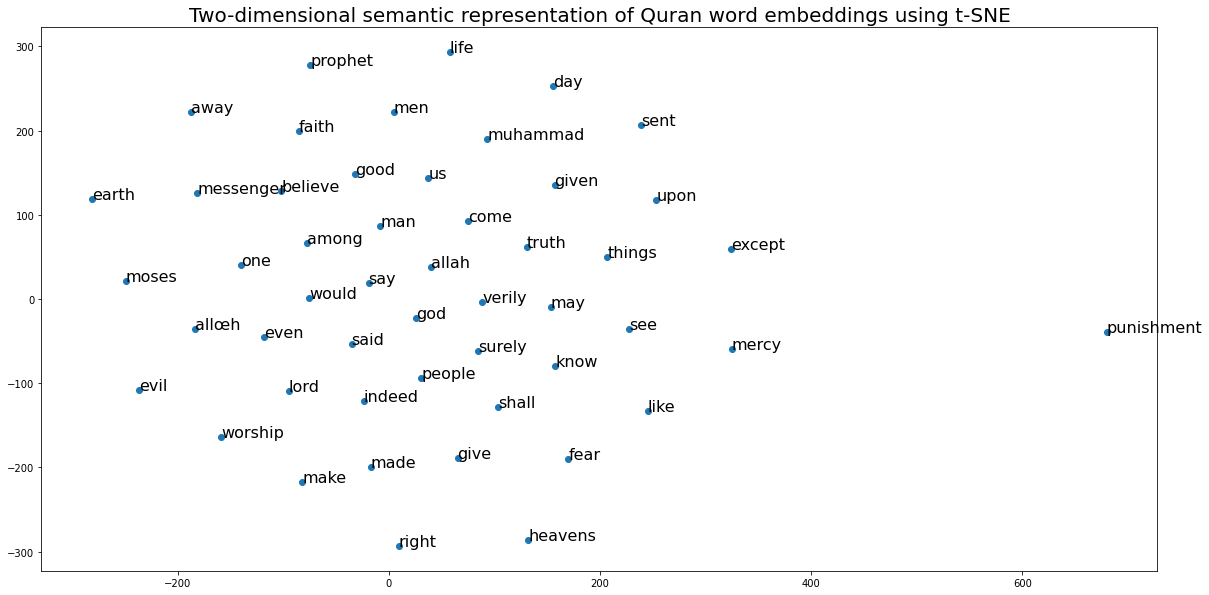

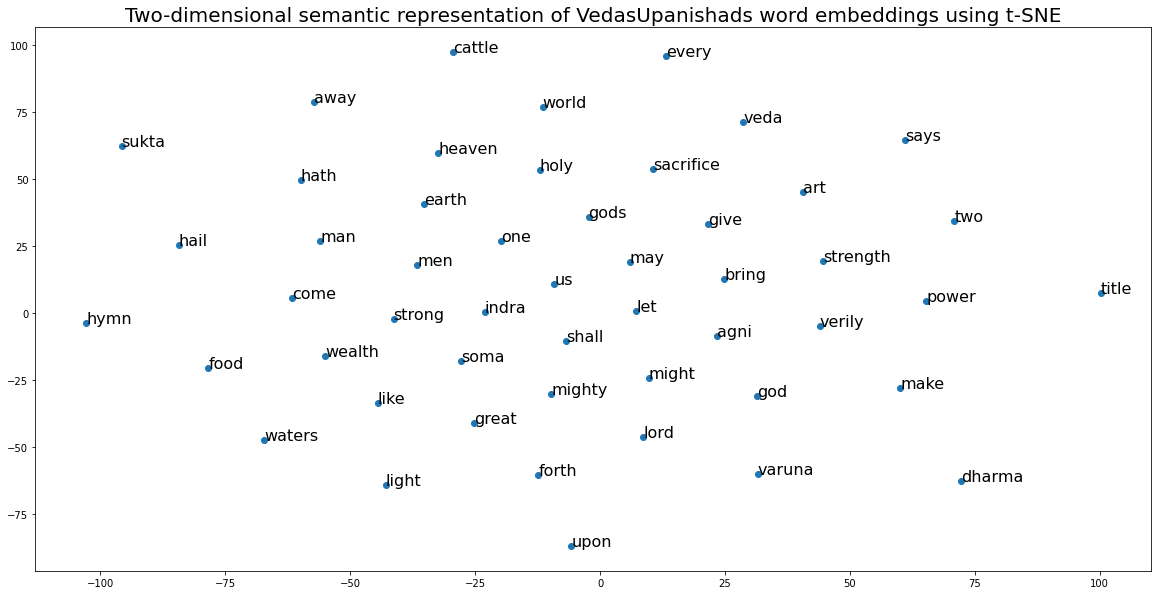

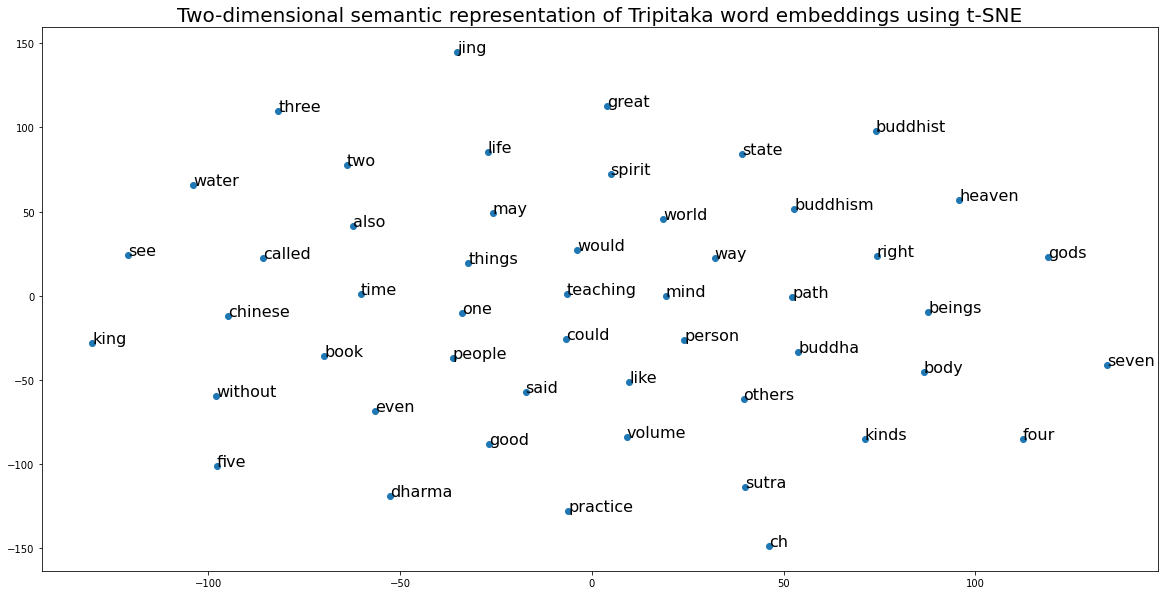

In [ ]:
texts = ['Bible', 'Quran', 'VedasUpanishads', 'Tripitaka']

for text in texts:
  final_data, top_frec_words, Y = data_for_TSNE(30, 50, text)
  plot_TSNE(top_frec_words, Y, text)